In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
df = pd.read_csv(r"C:\Users\palash\Downloads\monthly-beer-production-in-austr.csv")
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [3]:
df = pd.read_csv(r"C:\Users\palash\Downloads\monthly-beer-production-in-austr.csv",index_col='Month',parse_dates=True)
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


<Axes: xlabel='Month', ylabel='Monthly beer production'>

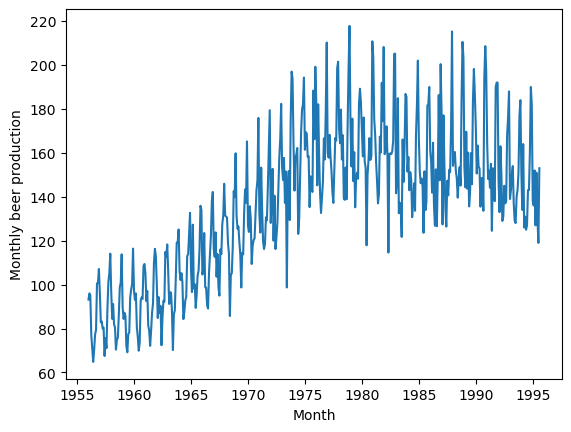

In [4]:
sns.lineplot(data = df,x = df.index, y= "Monthly beer production")

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
sd = seasonal_decompose(df['Monthly beer production'])
sd

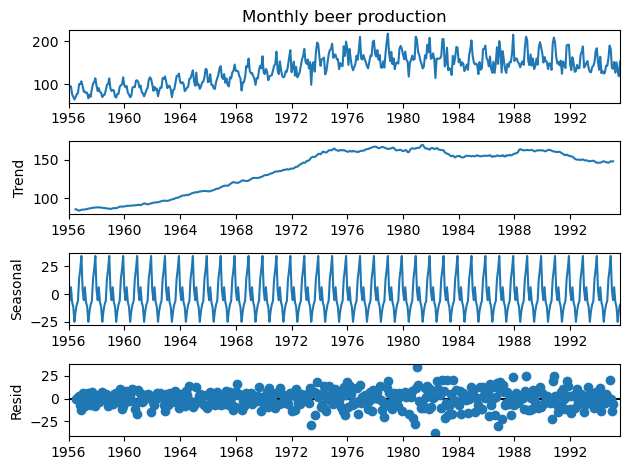

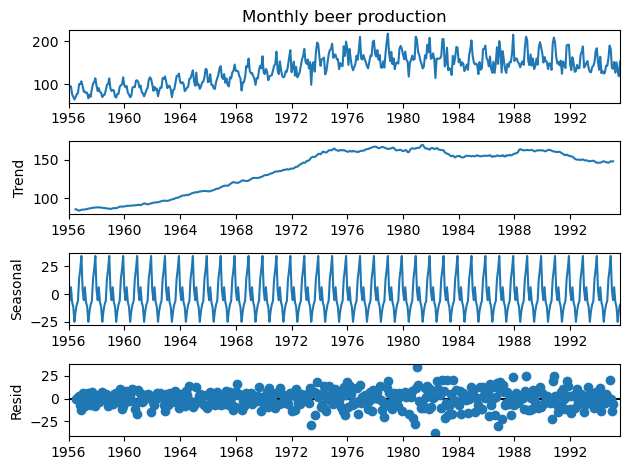

In [6]:
sd.plot()

In [7]:
# 20% data in test
num = round(df.shape[0]* 0.20)
y_train = df.iloc[:-num]
y_test = df.iloc[-num:]

In [8]:
len(y_train) + len(y_test)

476

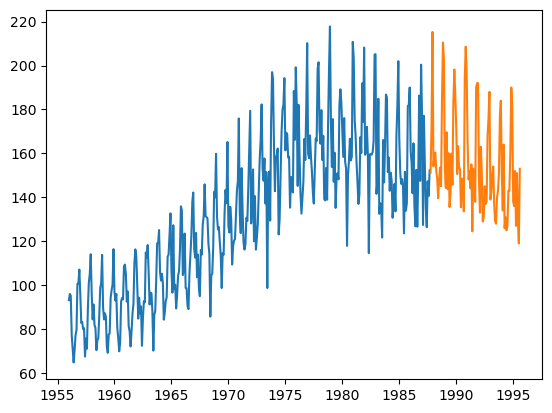

In [9]:
plt.plot(y_train)
plt.plot(y_test)

In [10]:
y = pd.Series([1,2,3,4,5,6,7,8])

In [11]:
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array
generator = tf.keras.utils.timeseries_dataset_from_array(y, y[2:], sequence_length=2,
                                                          batch_size=3)

In [12]:
for batch in generator:
  inputs, targets = batch
  print(inputs)
  print(targets)
  print("------------------")

tf.Tensor(
[[1 2]
 [2 3]
 [3 4]], shape=(3, 2), dtype=int64)
tf.Tensor([3 4 5], shape=(3,), dtype=int64)
------------------
tf.Tensor(
[[4 5]
 [5 6]
 [6 7]], shape=(3, 2), dtype=int64)
tf.Tensor([6 7 8], shape=(3,), dtype=int64)
------------------


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

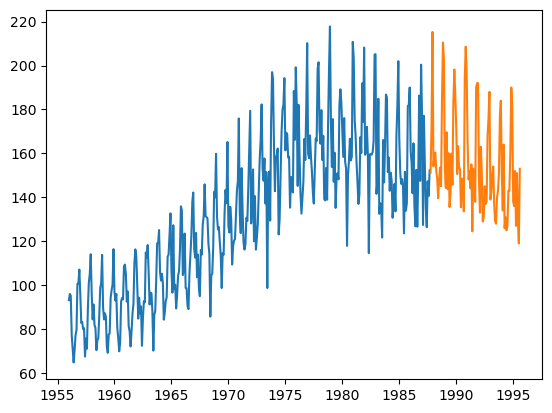

In [14]:
plt.plot(y_train)
plt.plot(y_test)
plt.show()

In [15]:
def train_data_gen(train_data, window_size, batch_size = 1):

  generator = tf.keras.utils.timeseries_dataset_from_array(train_data,
                                                           train_data[window_size:],
                                                           sequence_length=window_size,
                                                          batch_size=batch_size)
  return generator

In [16]:
train_gen = train_data_gen(y_train, 12, 1)
test_gen = train_data_gen(y_test, 12, 1)

In [17]:
for batch in train_gen:
  inputs, targets = batch
  print(inputs)
  print(targets)
  print("------------------")

tf.Tensor(
[[[ 93.2]
  [ 96. ]
  [ 95.2]
  [ 77.1]
  [ 70.9]
  [ 64.8]
  [ 70.1]
  [ 77.3]
  [ 79.5]
  [100.6]
  [100.7]
  [107.1]]], shape=(1, 12, 1), dtype=float64)
tf.Tensor([[95.9]], shape=(1, 1), dtype=float64)
------------------
tf.Tensor(
[[[ 96. ]
  [ 95.2]
  [ 77.1]
  [ 70.9]
  [ 64.8]
  [ 70.1]
  [ 77.3]
  [ 79.5]
  [100.6]
  [100.7]
  [107.1]
  [ 95.9]]], shape=(1, 12, 1), dtype=float64)
tf.Tensor([[82.8]], shape=(1, 1), dtype=float64)
------------------
tf.Tensor(
[[[ 95.2]
  [ 77.1]
  [ 70.9]
  [ 64.8]
  [ 70.1]
  [ 77.3]
  [ 79.5]
  [100.6]
  [100.7]
  [107.1]
  [ 95.9]
  [ 82.8]]], shape=(1, 12, 1), dtype=float64)
tf.Tensor([[83.3]], shape=(1, 1), dtype=float64)
------------------
tf.Tensor(
[[[ 77.1]
  [ 70.9]
  [ 64.8]
  [ 70.1]
  [ 77.3]
  [ 79.5]
  [100.6]
  [100.7]
  [107.1]
  [ 95.9]
  [ 82.8]
  [ 83.3]]], shape=(1, 12, 1), dtype=float64)
tf.Tensor([[80.]], shape=(1, 1), dtype=float64)
------------------
tf.Tensor(
[[[ 70.9]
  [ 64.8]
  [ 70.1]
  [ 77.3]
  [ 79.5]


tf.Tensor(
[[[114.3]
  [ 85.7]
  [104.6]
  [105.1]
  [117.3]
  [142.5]
  [140. ]
  [159.8]
  [131.2]
  [125.4]
  [126.5]
  [119.4]]], shape=(1, 12, 1), dtype=float64)
tf.Tensor([[113.5]], shape=(1, 1), dtype=float64)
------------------
tf.Tensor(
[[[ 85.7]
  [104.6]
  [105.1]
  [117.3]
  [142.5]
  [140. ]
  [159.8]
  [131.2]
  [125.4]
  [126.5]
  [119.4]
  [113.5]]], shape=(1, 12, 1), dtype=float64)
tf.Tensor([[98.7]], shape=(1, 1), dtype=float64)
------------------
tf.Tensor(
[[[104.6]
  [105.1]
  [117.3]
  [142.5]
  [140. ]
  [159.8]
  [131.2]
  [125.4]
  [126.5]
  [119.4]
  [113.5]
  [ 98.7]]], shape=(1, 12, 1), dtype=float64)
tf.Tensor([[114.5]], shape=(1, 1), dtype=float64)
------------------
tf.Tensor(
[[[105.1]
  [117.3]
  [142.5]
  [140. ]
  [159.8]
  [131.2]
  [125.4]
  [126.5]
  [119.4]
  [113.5]
  [ 98.7]
  [114.5]]], shape=(1, 12, 1), dtype=float64)
tf.Tensor([[113.8]], shape=(1, 1), dtype=float64)
------------------
tf.Tensor(
[[[117.3]
  [142.5]
  [140. ]
  [159.8]
  [131

tf.Tensor(
[[[151. ]
  [148.2]
  [182.2]
  [189.2]
  [183.1]
  [170. ]
  [158.4]
  [176.1]
  [156.2]
  [153.2]
  [117.9]
  [149.8]]], shape=(1, 12, 1), dtype=float64)
tf.Tensor([[156.6]], shape=(1, 1), dtype=float64)
------------------
tf.Tensor(
[[[148.2]
  [182.2]
  [189.2]
  [183.1]
  [170. ]
  [158.4]
  [176.1]
  [156.2]
  [153.2]
  [117.9]
  [149.8]
  [156.6]]], shape=(1, 12, 1), dtype=float64)
tf.Tensor([[166.7]], shape=(1, 1), dtype=float64)
------------------
tf.Tensor(
[[[182.2]
  [189.2]
  [183.1]
  [170. ]
  [158.4]
  [176.1]
  [156.2]
  [153.2]
  [117.9]
  [149.8]
  [156.6]
  [166.7]]], shape=(1, 12, 1), dtype=float64)
tf.Tensor([[156.8]], shape=(1, 1), dtype=float64)
------------------
tf.Tensor(
[[[189.2]
  [183.1]
  [170. ]
  [158.4]
  [176.1]
  [156.2]
  [153.2]
  [117.9]
  [149.8]
  [156.6]
  [166.7]
  [156.8]]], shape=(1, 12, 1), dtype=float64)
tf.Tensor([[158.6]], shape=(1, 1), dtype=float64)
------------------
tf.Tensor(
[[[183.1]
  [170. ]
  [158.4]
  [176.1]
  [15

In [18]:

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(12, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [19]:
model_rnn = Sequential([
    SimpleRNN(100,return_sequences = True,activation = "relu", input_shape = (12,1)),
    SimpleRNN(64,activation = "relu"),
    Dense(1)
])


model_rnn.compile(
    loss = "mean_squared_error",
    optimizer = "adam",
    metrics = ["mean_absolute_error"]
)

result_rnn = model_rnn.fit(train_gen, epochs = 10, validation_data = (test_gen))

Epoch 1/10


369/369 [==============================] - 7s 8ms/step - loss: 498.4300 - mean_absolute_error: 18.1018 - val_loss: 436.3438 - val_mean_absolute_error: 16.6839
Epoch 2/10
369/369 [==============================] - 3s 7ms/step - loss: 347.3018 - mean_absolute_error: 14.2177 - val_loss: 496.1275 - val_mean_absolute_error: 17.4982
Epoch 3/10
369/369 [==============================] - 2s 6ms/step - loss: 299.1683 - mean_absolute_error: 12.9445 - val_loss: 283.4674 - val_mean_absolute_error: 13.4260
Epoch 4/10
369/369 [==============================] - 2s 4ms/step - loss: 271.4738 - mean_absolute_error: 12.2854 - val_loss: 275.0442 - val_mean_absolute_error: 13.0211
Epoch 5/10
369/369 [==============================] - 2s 4ms/step - loss: 289.3689 - mean_absolute_error: 12.5486 - val_loss: 256.9039 - val_mean_absolute_error: 12.7535
Epoch 6/10
369/369 [==============================] - 2s 4ms/step - loss: 230.4636 - mean_absolute_error: 11.5985 - val_loss: 498.7307 - val_mean_ab

In [20]:
def plot_curve(history):
  history_df = pd.DataFrame(history.history)

  fig, ax = plt.subplots(1,2, figsize = (10,4))

  sns.lineplot(data = history_df,x = history_df.index+1, y = "loss", label = "train_mse", ax = ax[0])
  sns.lineplot(data = history_df,x = history_df.index+1, y = "val_loss", label = "validation_mse",ax = ax[0])


  sns.lineplot(data = history_df,x = history_df.index+1, y = "mean_absolute_error", label = "train_mae", ax = ax[1])
  sns.lineplot(data = history_df,x = history_df.index+1, y = "val_mean_absolute_error", label = "validation_mae", ax = ax[1])

  fig.suptitle("mse & mae curve plot")
  plt.tight_layout()
  plt.show()

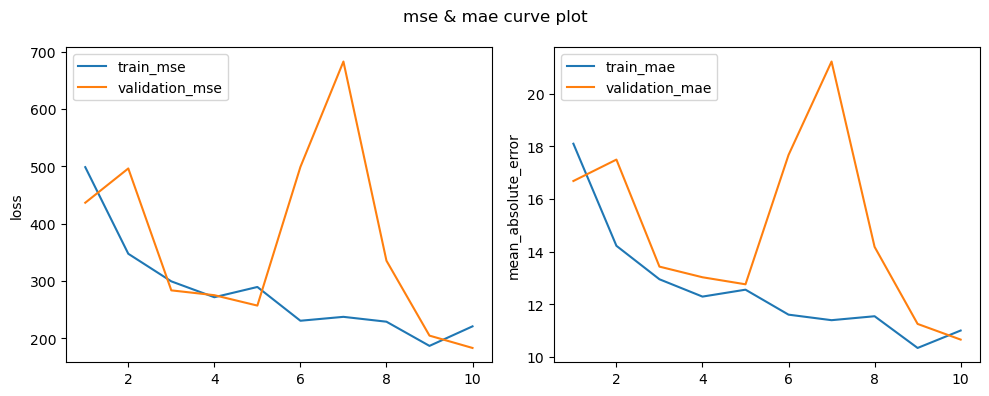

In [21]:
plot_curve(result_rnn)

In [22]:
model_rnn.predict(np.array(y_train[-12:]).reshape(1, 12,1))

1/1 [==============================] - 0s 455ms/step


array([[162.98323]], dtype=float32)

In [23]:
train_data = np.array(y_train.copy())
train_data[-12:].reshape(1, 12,1)

array([[[186.3],
        [147.5],
        [200.4],
        [177.2],
        [127.4],
        [177.1],
        [154.4],
        [135.2],
        [126.4],
        [147.3],
        [140.6],
        [152.3]]])

In [28]:
train_data = np.append(train_data, [[7]])
train_data[-12:]

array([147.5, 200.4, 177.2, 127.4, 177.1, 154.4, 135.2, 126.4, 147.3,
       140.6, 152.3,   7. ])

In [24]:
def predict_range(model, y_train, num_prediction):
  y_pred = []
  train_data = np.array(y_train.copy())
  for i in range(num_prediction):
    result = model.predict(train_data[-12:].reshape(1, 12,1))
    y_pred.append(result[0][0])
    train_data = np.append(train_data, result)

  return np.array(y_pred)



In [29]:
y_pred = predict_range(model_rnn, y_train, 216)

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 16ms/step


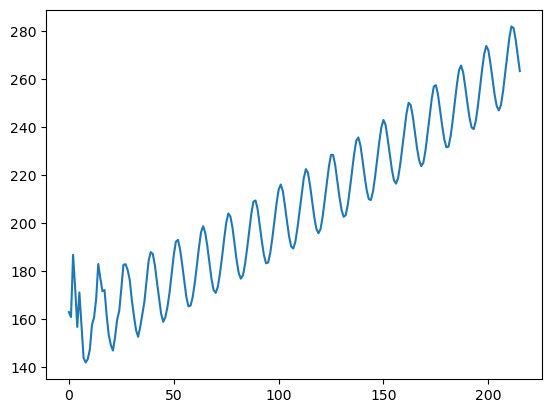

In [30]:
plt.plot(y_pred)

In [27]:
model_lstm = Sequential([
    LSTM(100,return_sequences = True,activation = "relu", input_shape = (12,1)),
    LSTM(64,activation = "relu"),
    Dense(32, activation = "relu"),
    Dense(1)
])


model_lstm.compile(
    loss = "mean_squared_error",
    optimizer = "adam",
    metrics = ["mean_absolute_error"]
)

result_lstm = model_lstm.fit(train_gen, epochs = 10, validation_data = (test_gen))

Epoch 1/10
369/369 [==============================] - 8s 11ms/step - loss: 763.1313 - mean_absolute_error: 20.9356 - val_loss: 190.1314 - val_mean_absolute_error: 10.8013
Epoch 2/10
369/369 [==============================] - 4s 10ms/step - loss: 253.2260 - mean_absolute_error: 12.5572 - val_loss: 170.7271 - val_mean_absolute_error: 10.5291
Epoch 3/10
369/369 [==============================] - 3s 8ms/step - loss: 191.5509 - mean_absolute_error: 10.5056 - val_loss: 174.2968 - val_mean_absolute_error: 10.7841
Epoch 4/10
369/369 [==============================] - 2s 6ms/step - loss: 173.1270 - mean_absolute_error: 9.8121 - val_loss: 151.8994 - val_mean_absolute_error: 9.9646
Epoch 5/10
369/369 [==============================] - 2s 6ms/step - loss: 166.2589 - mean_absolute_error: 9.5496 - val_loss: 139.3841 - val_mean_absolute_error: 9.6048
Epoch 6/10
369/369 [==============================] - 2s 6ms/step - loss: 159.1474 - mean_absolute_error: 9.4668 - val_loss: 143.1648 - val_mean_absolut

ValueError: Length of values (216) does not match length of index (95)

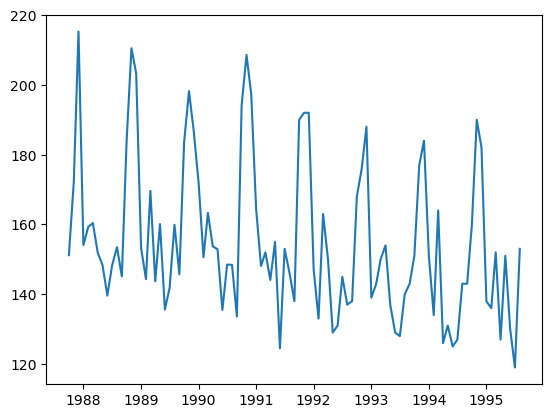

In [44]:
plt.plot(y_test)
plt.plot(pd.Series(y_pred, index = y_test.index))

In [32]:
pd.Series(y_pred, index = y_test.index)

ValueError: Length of values (216) does not match length of index (95)

In [42]:
len(y_test)

95